In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from hampel import hampel
import statsmodels.api as sm
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
%matplotlib inline

In [2]:
df = pd.read_excel('Problem_C_Data_Wordle.xlsx', header = 1)
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
df.rename(columns = {'Number of  reported results' : 'Num1'}, inplace = True)
df.rename(columns = {'Number in hard mode' : 'Num2'}, inplace = True)
df['Ratio'] = df['Num2'] / df['Num1']
df.sort_values(by = ['Contest number'], inplace = True)
df.index = df['Contest number'] - 202
df.loc[545 - 202, 'Word'] = 'probe'
df.dropna()

,Date,Contest number,Word,Num1,Num2,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X),Ratio
Contest number,,,,,,,,,,,,,
0,2022-01-07,202,slump,80630,1362,1,3,23,39,24,9,1,0.016892
1,2022-01-08,203,crank,101503,1763,1,5,23,31,24,14,2,0.017369
2,2022-01-09,204,gorge,91477,1913,1,3,13,27,30,22,4,0.020912
3,2022-01-10,205,query,107134,2242,1,4,16,30,30,17,2,0.020927
4,2022-01-11,206,drink,153880,3017,1,9,35,34,16,5,1,0.019606
...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,2022-12-27,556,condo,20879,2012,0,2,17,35,29,14,3,0.096365
355,2022-12-28,557,impel,20160,1937,0,3,21,40,25,9,1,0.096081
356,2022-12-29,558,havoc,20001,1919,0,2,16,38,30,12,2,0.095945


<AxesSubplot:xlabel='Date'>

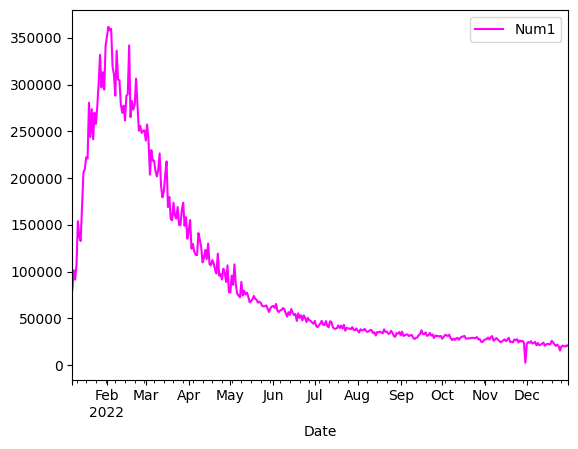

In [3]:
df.plot(x = 'Date', y = 'Num1', kind = 'line', colormap = 'spring')

<AxesSubplot:xlabel='Date'>

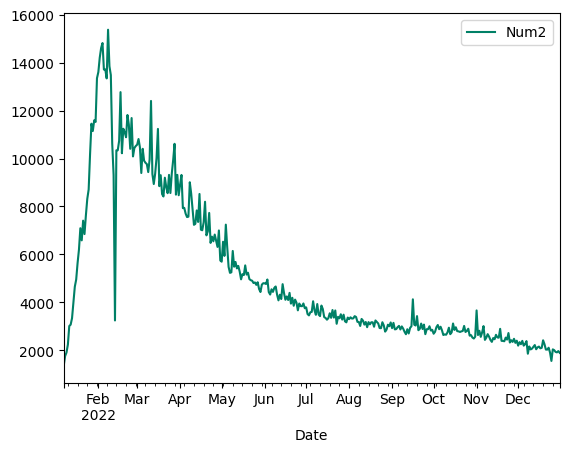

In [4]:
df.plot.line(x = 'Date', y = 'Num2', colormap = 'summer')

<AxesSubplot:xlabel='Date'>

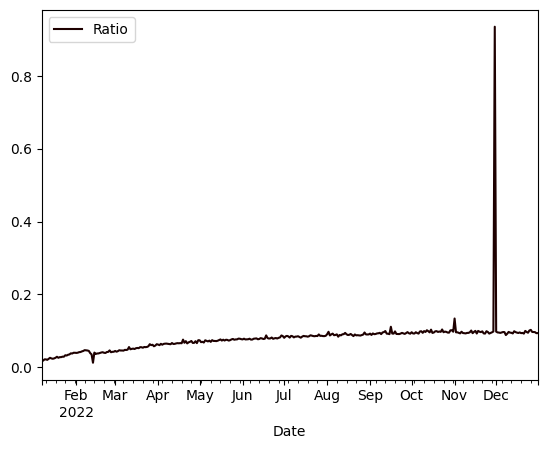

In [5]:
df.plot(x = 'Date', y = 'Ratio', kind = 'line', colormap = 'pink')

<AxesSubplot:xlabel='Date'>

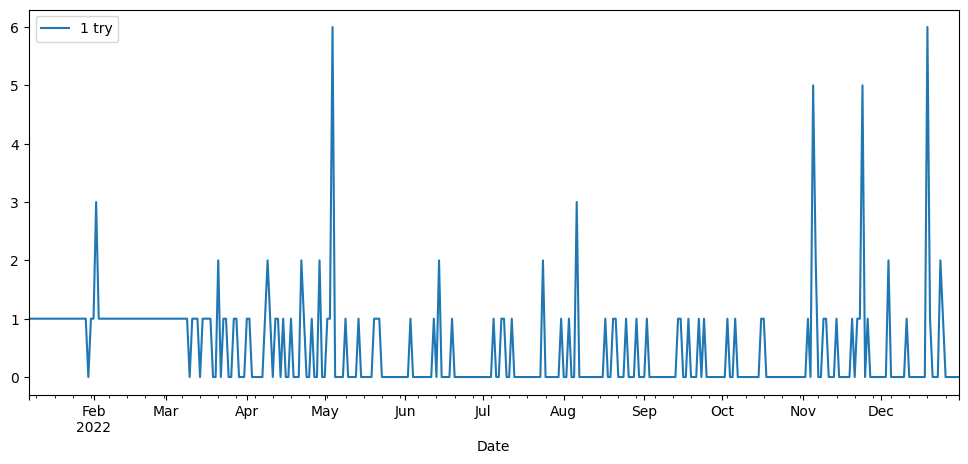

In [6]:
df.plot(x = 'Date', y = '1 try', figsize = (12, 5), kind = 'line')

<AxesSubplot:xlabel='Date'>

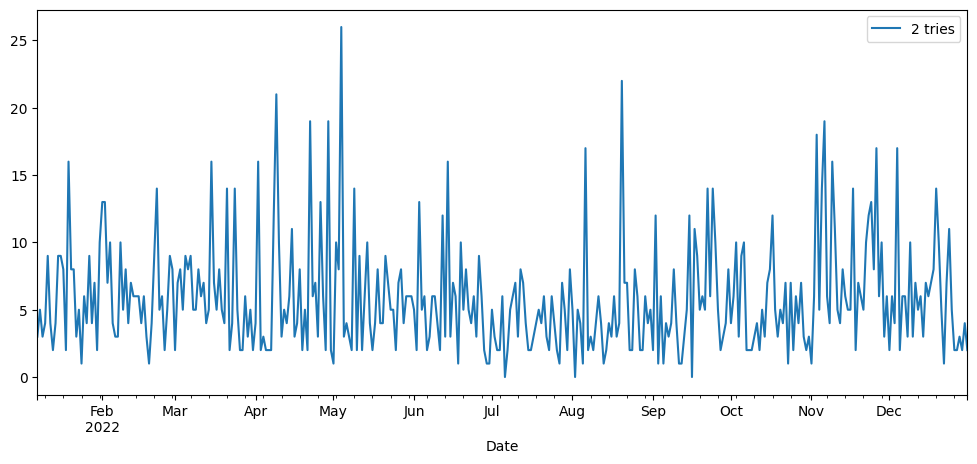

In [7]:
df.plot(x = 'Date', y = '2 tries', figsize = (12, 5), kind = 'line')

<AxesSubplot:xlabel='Date'>

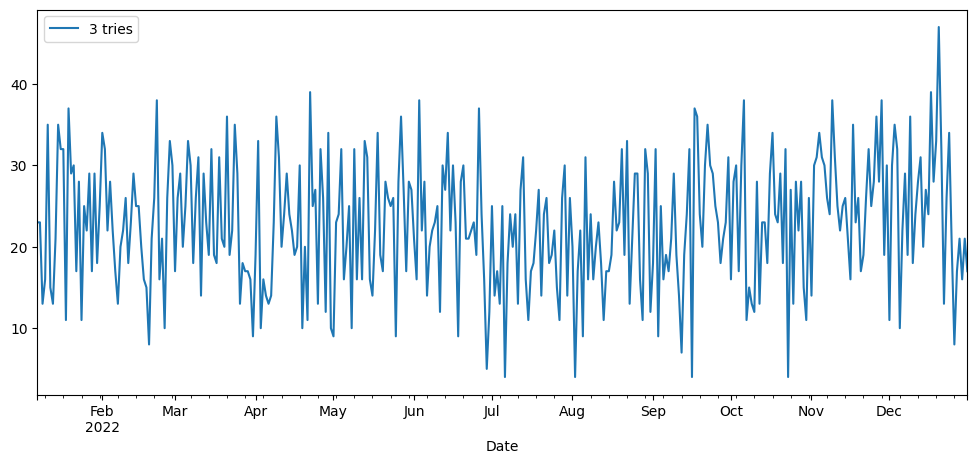

In [8]:
df.plot.line(x = 'Date', y = '3 tries', figsize = (12, 5))

<AxesSubplot:xlabel='Date'>

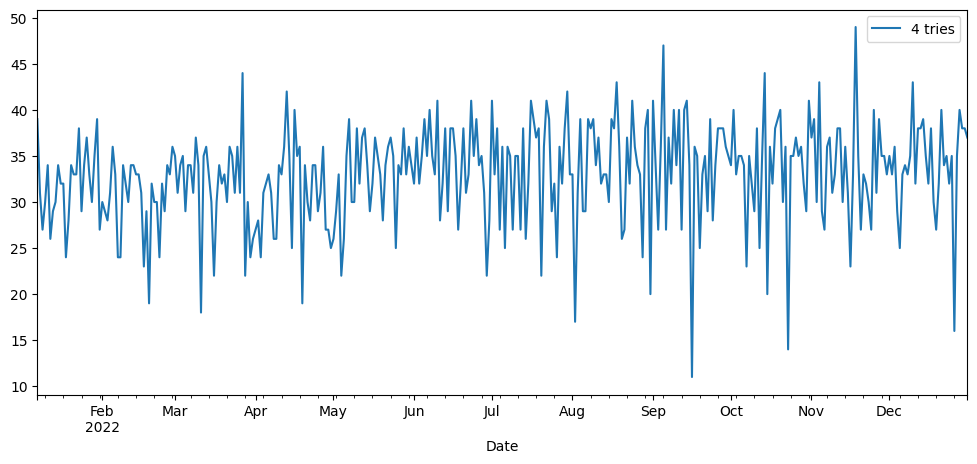

In [9]:
df.plot.line(x = 'Date', y = '4 tries', figsize = (12, 5))

<AxesSubplot:xlabel='Date'>

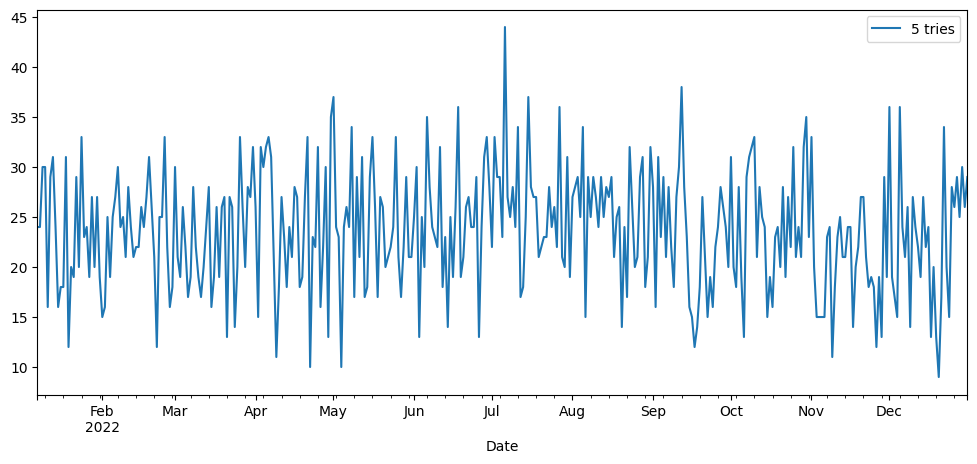

In [10]:
df.plot.line(x = 'Date', y = '5 tries', figsize = (12, 5))

<AxesSubplot:xlabel='Date'>

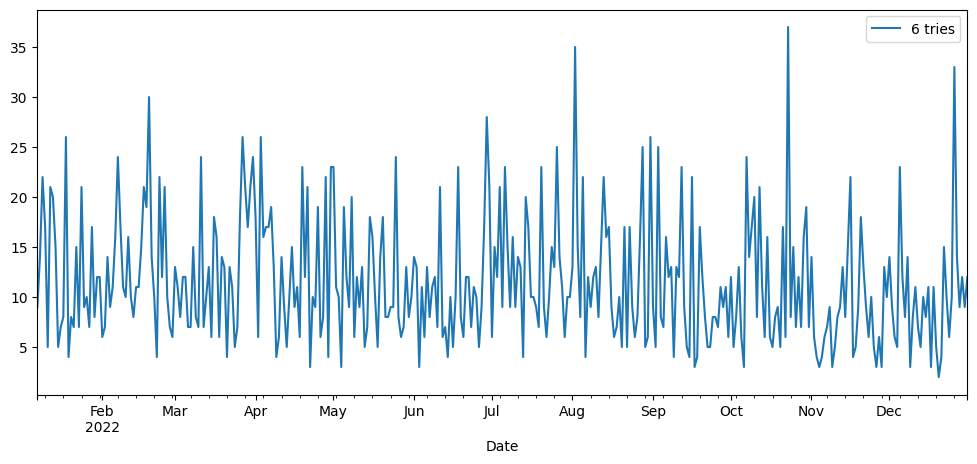

In [11]:
df.plot.line(x = 'Date', y = '6 tries', figsize = (12, 5))

<AxesSubplot:xlabel='Date'>

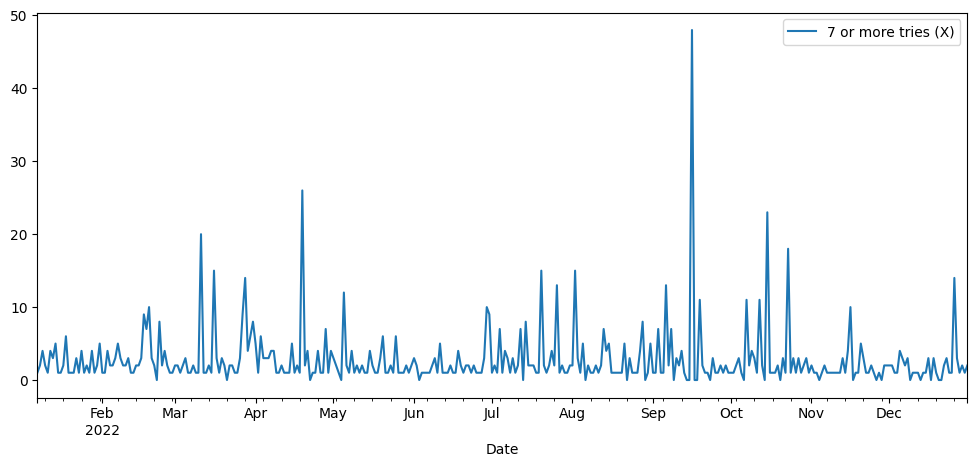

In [12]:
df.plot.line(x = 'Date', y = '7 or more tries (X)', figsize = (12, 5))

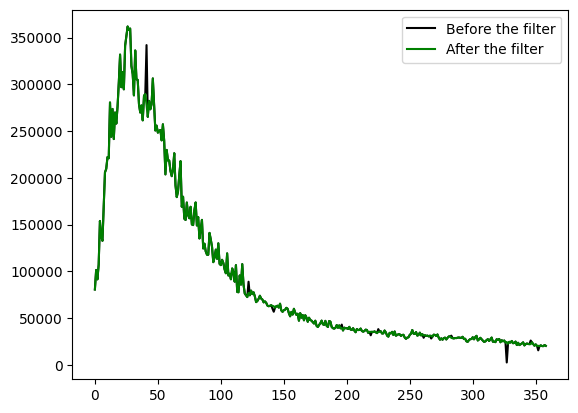

In [13]:
# Just outlier detection
Num1_outlier = pd.Series(df['Num1'].values)
outlier_indices = hampel(Num1_outlier, window_size=5, n=3)
# Outlier Imputation with rolling median
Num1_outlier_imputation = hampel(Num1_outlier, window_size=5, n=3, imputation=True)
Num1_outlier.plot(style="k-")
Num1_outlier_imputation.plot(style="g-")
plt.legend(['Before the filter', 'After the filter'])
plt.show()

In [14]:
df['Num1'].compare(Num1_outlier_imputation)

,self,other
41,342003.0,278101.0
122,88932.0,76938.5
141,60069.0,62978.0
142,56839.0,62745.5
196,43099.0,39639.0
219,31652.0,35326.0
225,38245.0,35240.5
261,28994.0,31432.0
267,28202.0,31104.0
283,31269.0,28823.5


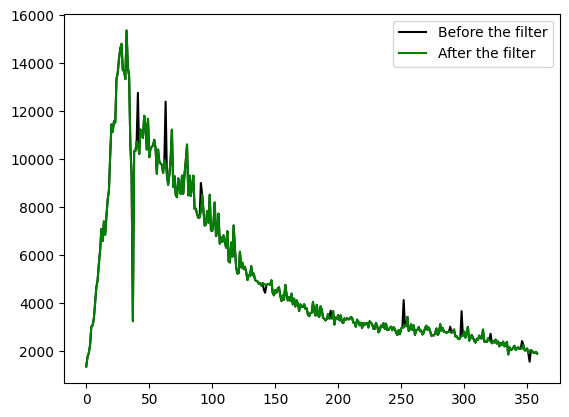

In [15]:
# Just outlier detection
Num2_outlier = pd.Series(df['Num2'].values)
outlier_indices = hampel(Num2_outlier, window_size=5, n=3)
# Outlier Imputation with rolling median
Num2_outlier_imputation = hampel(Num2_outlier, window_size=5, n=3, imputation=True)
Num2_outlier.plot(style="k-")
Num2_outlier_imputation.plot(style="g-")
plt.legend(['Before the filter', 'After the filter'])
plt.show()

In [16]:
df['Num2'].compare(Num2_outlier_imputation)

,self,other
41,12767.0,10541.5
63,12400.0,9795.0
91,9010.0,7798.0
141,4562.0,4799.5
142,4435.0,4783.5
194,3685.0,3362.5
252,4130.0,2974.5
289,3021.0,2799.5
298,3667.0,2625.5
321,2725.0,2412.0


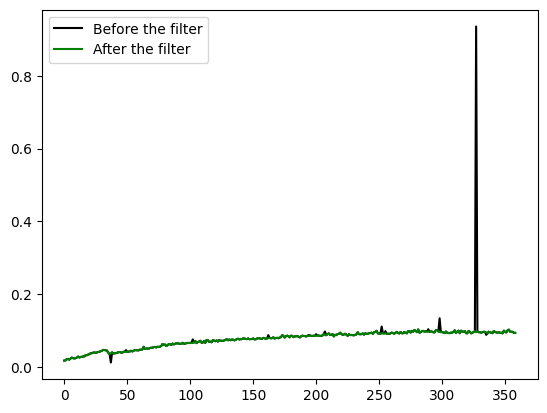

In [17]:
# Just outlier detection
Ratio_outlier = pd.Series(df['Ratio'].values)
outlier_indices = hampel(Ratio_outlier, window_size=5, n=3)
# Outlier Imputation with rolling median
Ratio_outlier_imputation = hampel(Ratio_outlier, window_size=5, n=3, imputation=True)
Ratio_outlier.plot(style="k-")
Ratio_outlier_imputation.plot(style="g-")
plt.legend(['Before the filter', 'After the filter'])
plt.show()

In [18]:
df['Ratio'].compare(Ratio_outlier_imputation)

,self,other
37,0.011709,0.037729
49,0.045669,0.041309
102,0.075281,0.065625
162,0.086876,0.078525
194,0.087246,0.084846
200,0.089531,0.085271
207,0.096823,0.087046
252,0.110697,0.091867
255,0.097860,0.091592
289,0.103180,0.096956


In [19]:
df['Num1'] = Num1_outlier_imputation
df['Num2'] = Num2_outlier_imputation
df['Ratio'] = Ratio_outlier_imputation

<AxesSubplot:xlabel='Date'>

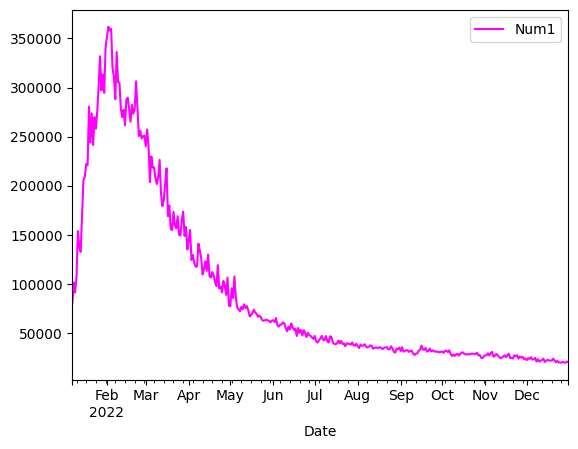

In [20]:
df.plot.line(x = 'Date', y = 'Num1', colormap = 'spring')

<AxesSubplot:xlabel='Date'>

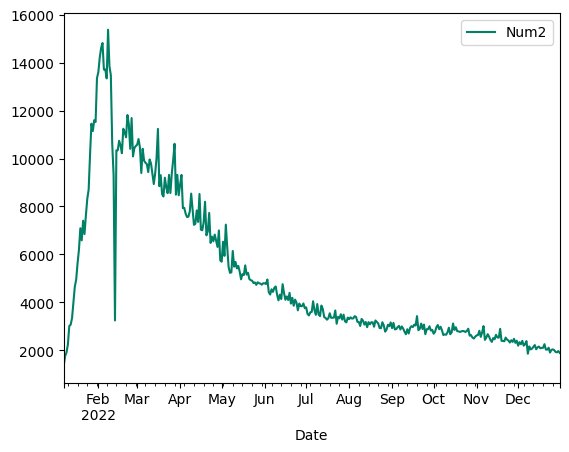

In [21]:
df.plot.line(x = 'Date', y = 'Num2', colormap = 'summer')

In [22]:
num = (df['Num2'][237 - 202] + df['Num2'][238 - 202] + df['Num2'][240 - 202] + df['Num2'][241 - 202])/4

In [23]:
num

10156.75

In [24]:
df.loc[239 - 202, 'Num2'] = num

<AxesSubplot:xlabel='Date'>

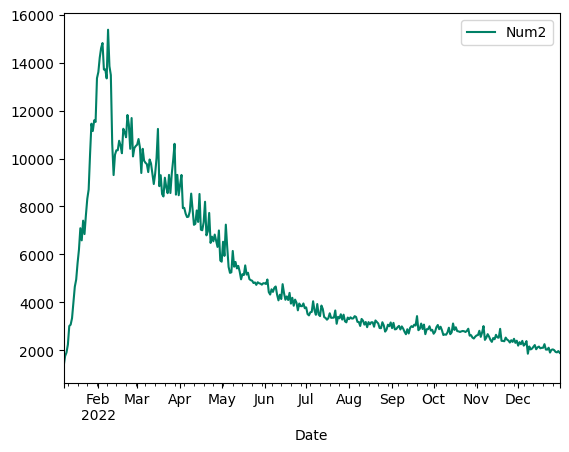

In [25]:
df.plot.line(x = 'Date', y = 'Num2', colormap = 'summer')

<AxesSubplot:xlabel='Date'>

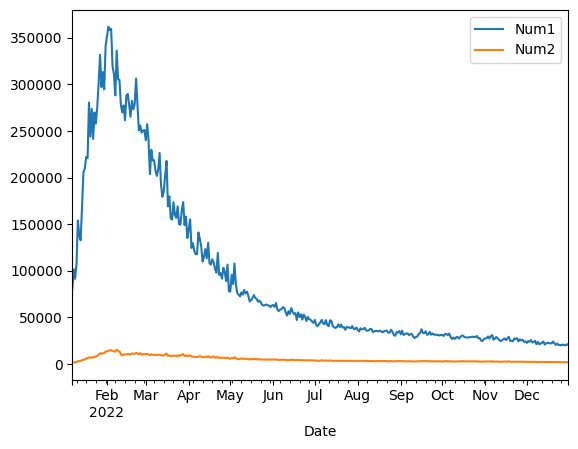

In [26]:
df.plot.line(x = 'Date', y = ['Num1', 'Num2'])

<AxesSubplot:>

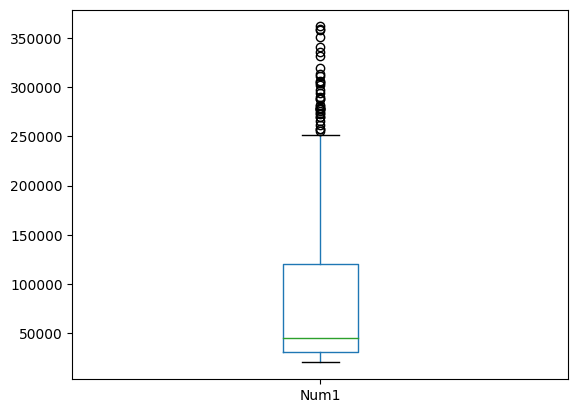

In [27]:
df['Num1'].plot(kind = 'box')

<AxesSubplot:>

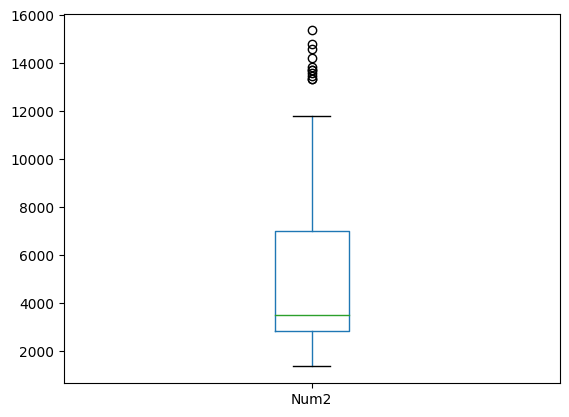

In [28]:
df['Num2'].plot(kind = 'box')

<AxesSubplot:>

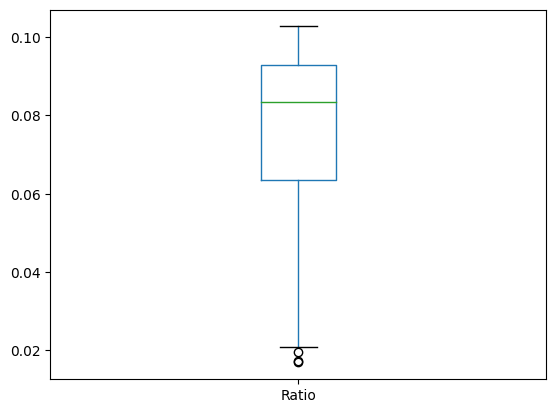

In [29]:
df['Ratio'].plot(kind = 'box')

<AxesSubplot:xlabel='Date'>

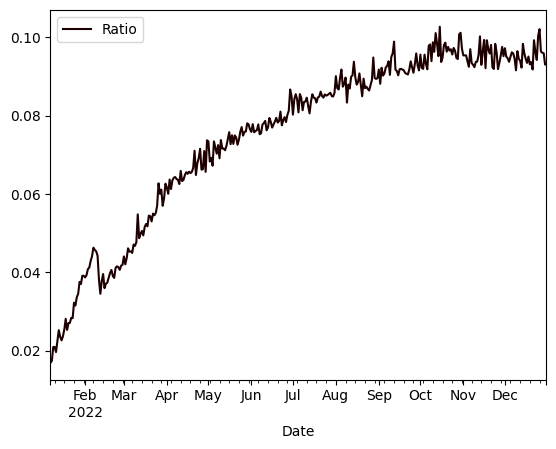

In [30]:
df.plot.line(x = 'Date', y = 'Ratio', colormap = 'pink')

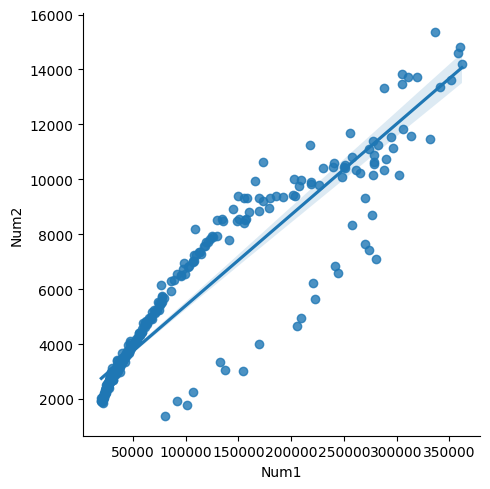

In [31]:
sns.lmplot(x = 'Num1', y = 'Num2', data = df)

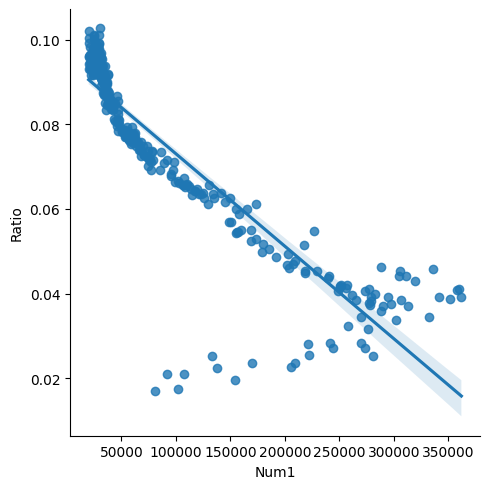

In [32]:
sns.lmplot(x = 'Num1', y = 'Ratio', data = df)

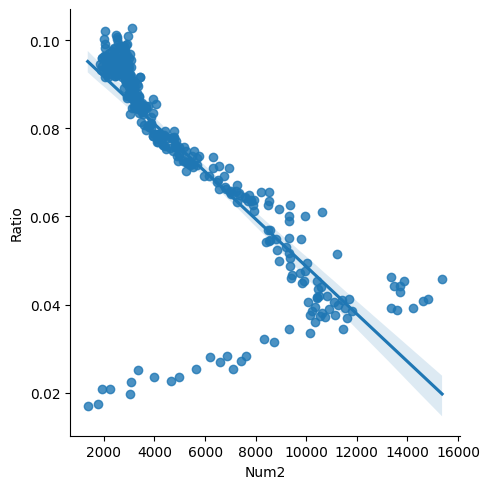

In [33]:
sns.lmplot(x = 'Num2', y = 'Ratio', data = df)

<AxesSubplot:>

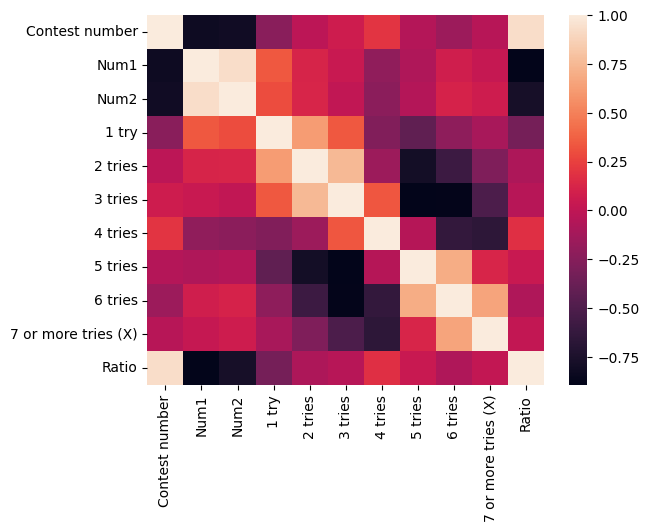

In [34]:
sns.heatmap(df.corr())

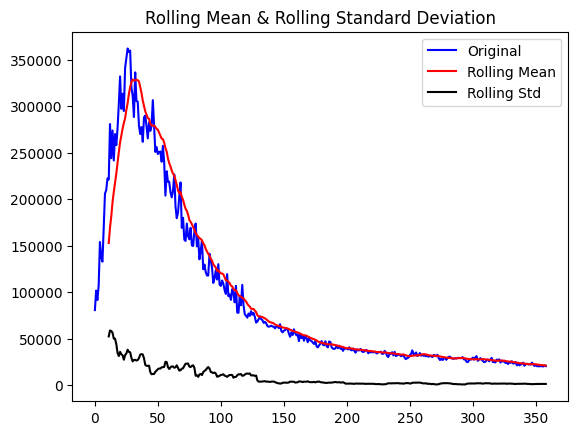

In [35]:
rolling_mean = df['Num1'].rolling(window = 12).mean()
rolling_std = df['Num1'].rolling(window = 12).std()
plt.plot(df['Num1'], color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

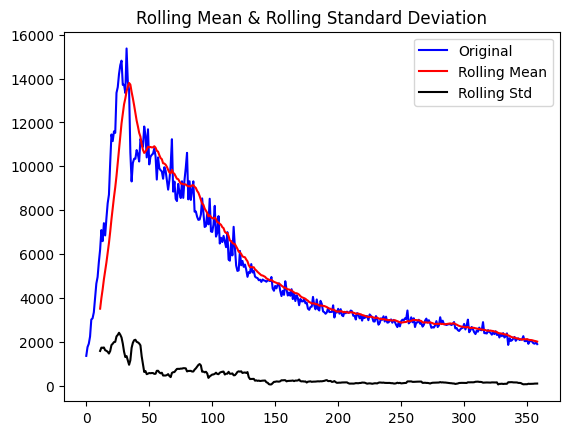

In [36]:
rolling_mean = df['Num2'].rolling(window = 12).mean()
rolling_std = df['Num2'].rolling(window = 12).std()
plt.plot(df['Num2'], color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

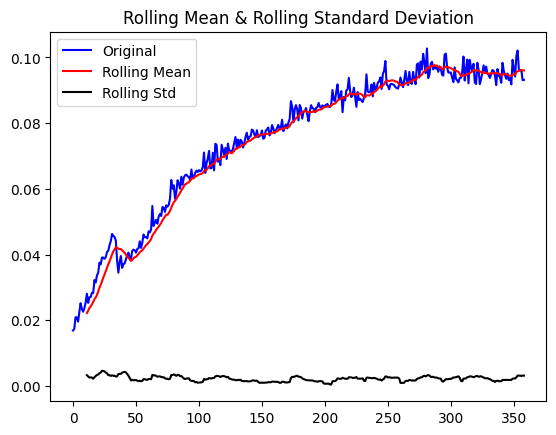

In [37]:
rolling_mean = df['Ratio'].rolling(window = 12).mean()
rolling_std = df['Ratio'].rolling(window = 12).std()
plt.plot(df['Ratio'], color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

In [38]:
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

In [39]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

In [40]:
adfuller_test(df['Num1'])

ADF Test Statistic : -3.32789585650907
p-value : 0.013676655538891531
#Lags Used : 17
Number of Observations : 341
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [41]:
kpss_test(df['Num1'])

KPSS Statistic: 2.2296747206224476
p-value: 0.01
num lags: 11
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [42]:
adfuller_test(df['Num2'])

ADF Test Statistic : -1.8203750435984243
p-value : 0.3703939926409856
#Lags Used : 17
Number of Observations : 341
weak evidence against null hypothesis,indicating it is non-stationary 


In [43]:
kpss_test(df['Num2'])

KPSS Statistic: 2.236266212967229
p-value: 0.01
num lags: 11
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [44]:
adfuller_test(df['Ratio'])

ADF Test Statistic : -3.7273770551065337
p-value : 0.0037441419593868455
#Lags Used : 3
Number of Observations : 355
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [45]:
kpss_test(df['Ratio'])

KPSS Statistic: 2.788571016661446
p-value: 0.01
num lags: 11
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [46]:
df['Num1_diff'] = df['Num1'] - df['Num1'].shift(1)
df.loc[0, 'Num1_diff'] = 0

df['Num2_diff'] = df['Num2'] - df['Num2'].shift(1)
df.loc[0, 'Num2_diff'] = 0

df['Ratio_diff'] = df['Ratio'] - df['Ratio'].shift(1)
df.loc[0, 'Ratio_diff'] = 0

In [47]:
adfuller_test(df['Num1_diff'])

ADF Test Statistic : -3.976195677308272
p-value : 0.0015404171850498974
#Lags Used : 17
Number of Observations : 341
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [48]:
kpss_test(df['Num1_diff'])

KPSS Statistic: 0.16637505238661263
p-value: 0.1
num lags: 12
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [49]:
adfuller_test(df['Num2_diff'])

ADF Test Statistic : -4.218234228290279
p-value : 0.0006136042353300683
#Lags Used : 17
Number of Observations : 341
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [50]:
kpss_test(df['Num2_diff'])

KPSS Statistic: 0.33401364188824456
p-value: 0.1
num lags: 2
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [51]:
adfuller_test(df['Ratio_diff'])

ADF Test Statistic : -16.39014059497548
p-value : 2.699098935699558e-29
#Lags Used : 2
Number of Observations : 356
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [52]:
kpss_test(df['Ratio_diff'])

KPSS Statistic: 0.834025677626341
p-value: 0.01
num lags: 20
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [53]:
df['Ratio_diff_2'] = df['Ratio_diff'] - df['Ratio_diff'].shift(1)
df.loc[0, 'Ratio_diff_2'] = 0

In [54]:
adfuller_test(df['Ratio_diff_2'])

ADF Test Statistic : -9.240959385885876
p-value : 1.5830791268702362e-15
#Lags Used : 15
Number of Observations : 343
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [55]:
kpss_test(df['Ratio_diff_2'])

KPSS Statistic: 0.03773844941795438
p-value: 0.1
num lags: 26
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


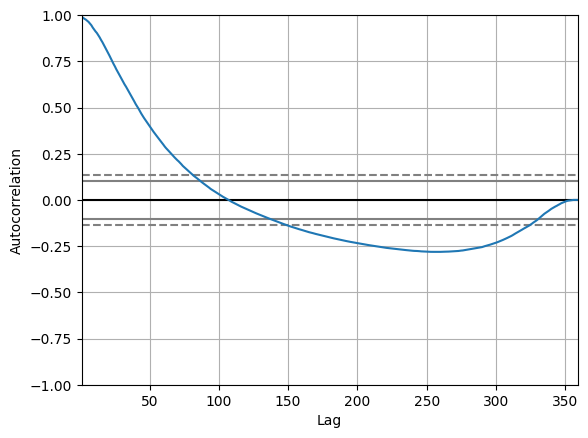

In [56]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Num1'])
plt.show()

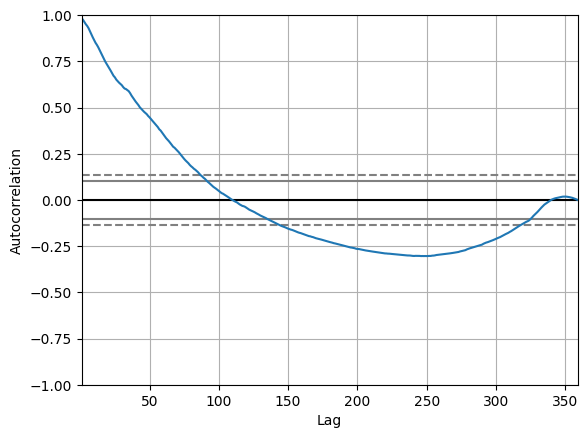

In [57]:
autocorrelation_plot(df['Num2'])
plt.show()

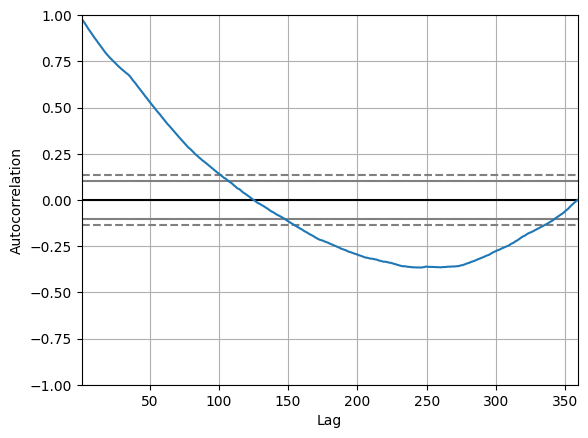

In [58]:
autocorrelation_plot(df['Ratio'])
plt.show()

/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


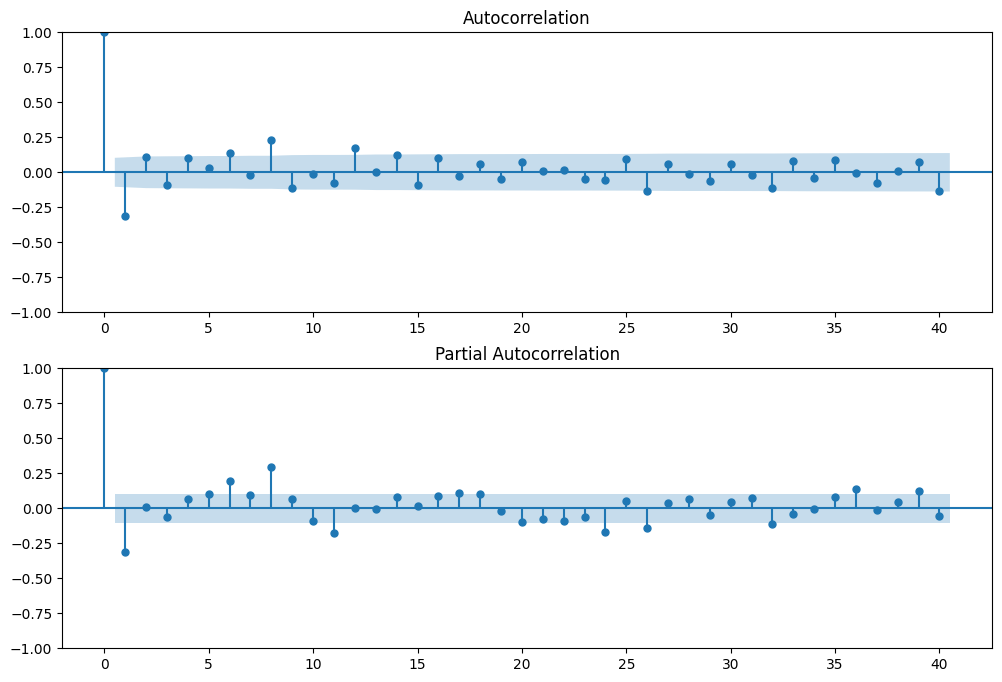

In [59]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Num1_diff'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Num1_diff'].dropna(),lags=40,ax=ax2)

/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


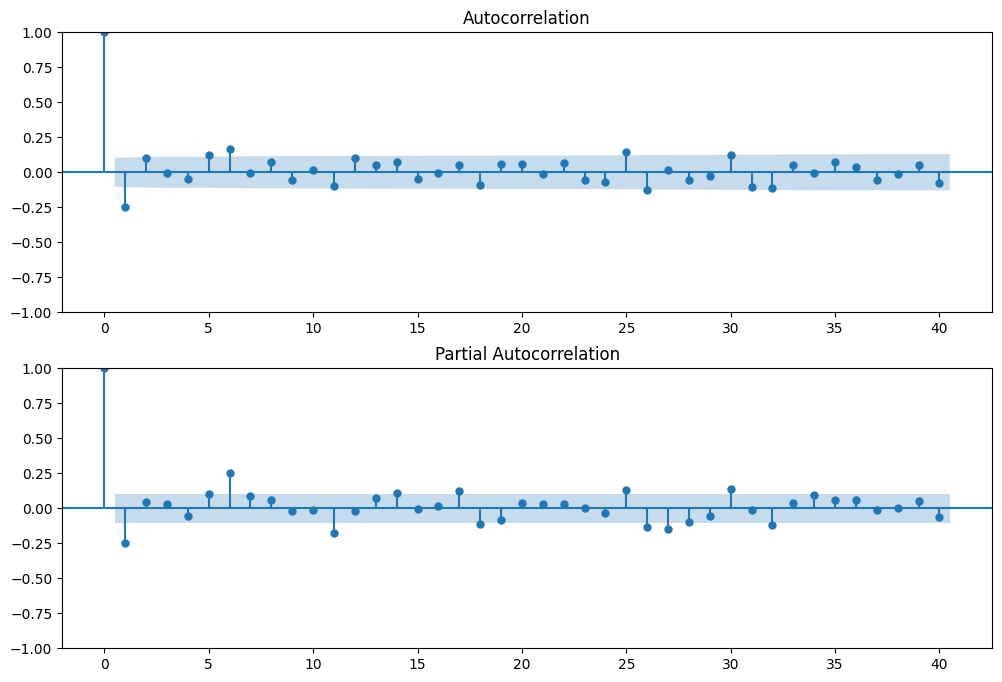

In [60]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Num2_diff'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Num2_diff'].dropna(),lags=40,ax=ax2)

/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


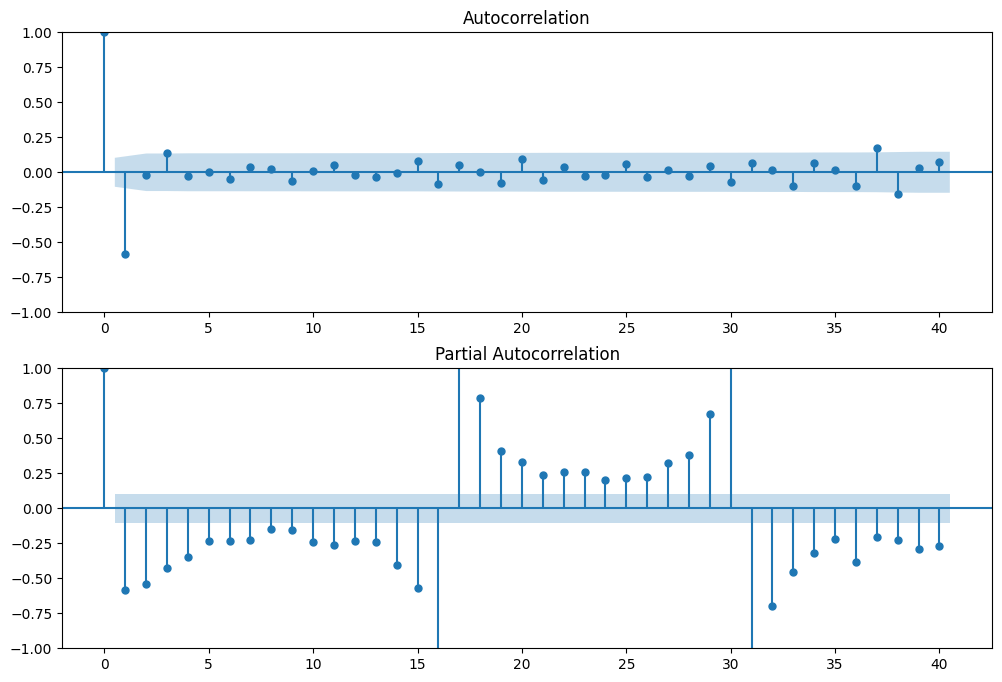

In [61]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Ratio_diff_2'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Ratio_diff_2'].dropna(),lags=40,ax=ax2)

<AxesSubplot:xlabel='Date'>

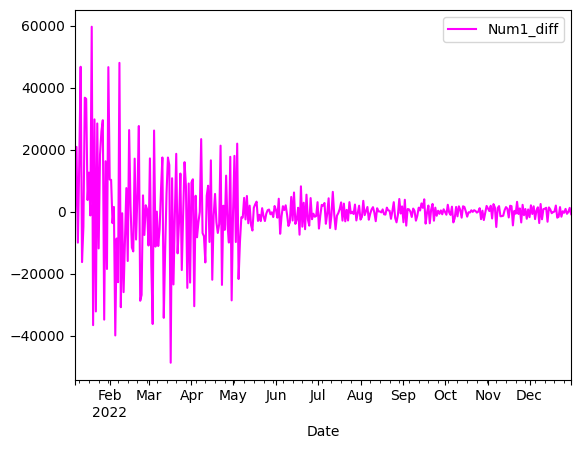

In [62]:
df.plot.line(x = 'Date', y = 'Num1_diff', colormap = 'spring')

<AxesSubplot:xlabel='Date'>

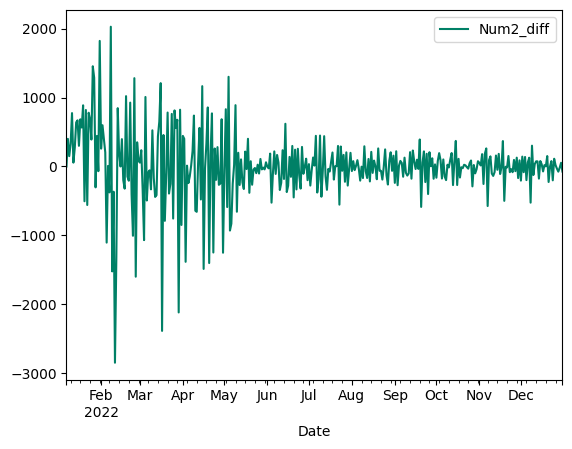

In [63]:
df.plot.line(x = 'Date', y = 'Num2_diff', colormap = 'summer')

<AxesSubplot:xlabel='Date'>

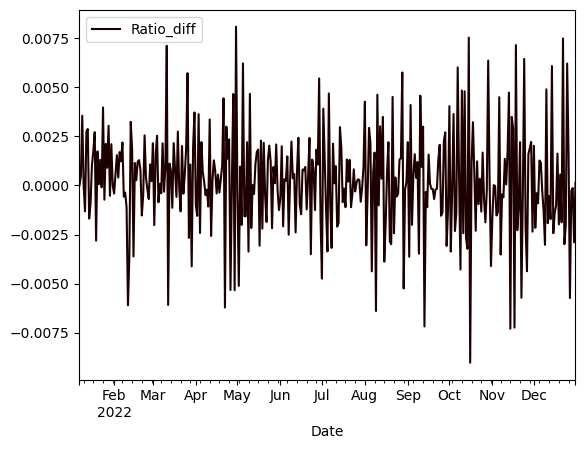

In [64]:
df.plot.line(x = 'Date', y = 'Ratio_diff', colormap = 'pink')

<AxesSubplot:xlabel='Date'>

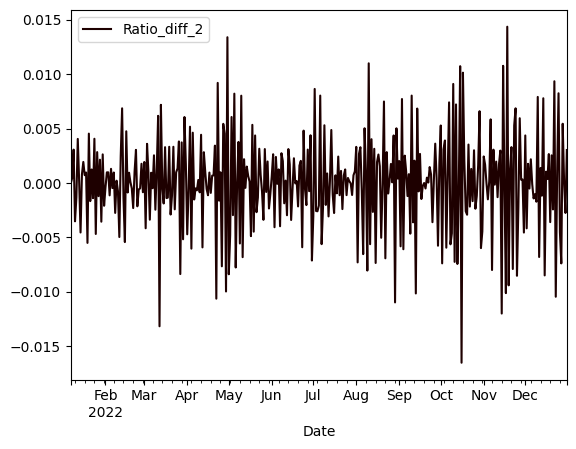

In [65]:
df.plot.line(x = 'Date', y = 'Ratio_diff_2', colormap = 'pink')

predicted=33798.968774, expected=35343.000000
predicted=34726.318790, expected=31903.000000
predicted=33025.873604, expected=35724.000000
predicted=34259.542979, expected=31191.000000
predicted=32709.255747, expected=32018.000000
predicted=31374.244142, expected=32733.000000
predicted=32263.028777, expected=32734.000000
predicted=32589.231507, expected=30992.000000
predicted=31380.976049, expected=31962.000000
predicted=31345.506562, expected=32172.000000
predicted=31932.495688, expected=29237.000000
predicted=29977.400925, expected=27887.000000
predicted=27817.704129, expected=29147.000000
predicted=28144.577898, expected=29497.000000
predicted=29014.135511, expected=32142.000000
predicted=31056.755651, expected=33344.000000
predicted=33040.567916, expected=37309.000000
predicted=36322.740499, expected=33418.000000
predicted=35230.243133, expected=33102.000000
predicted=33312.099131, expected=35050.000000
predicted=34536.465050, expected=31277.000000
predicted=32695.413433, expected=3

predicted=19555.182697, expected=19559.099945
predicted=19551.432700, expected=19555.182697
predicted=19547.842785, expected=19551.432700


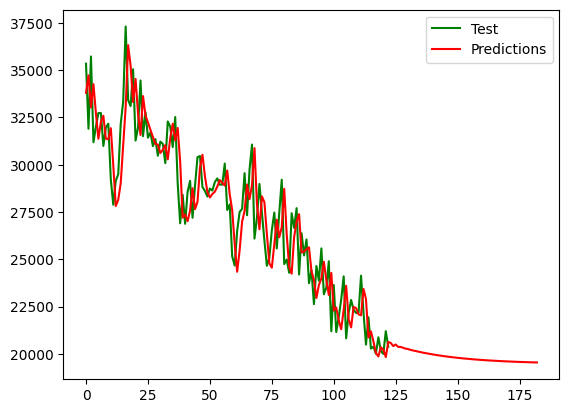

In [66]:
df.loc[0, 'Num1'] = 0
series = df['Num1']

# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(test) + 60):
 model = ARIMA(history, order=(2,1,1))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 if t < len(test):
        obs = test[t]
 else:
    obs = predictions[len(predictions) - 2]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))

# plot forecasts against actual outcomes
plt.plot(test, color = 'green', label = 'Test')
plt.plot(predictions, color='red', label = 'Predictions')
plt.legend()
plt.show()

predicted=3022.707860, expected=3166.000000
predicted=3123.158927, expected=2928.000000
predicted=2990.800174, expected=3149.000000
predicted=3084.722169, expected=2877.000000
predicted=2947.339191, expected=2889.000000
predicted=2870.941713, expected=2970.000000
predicted=2937.880063, expected=3022.000000
predicted=3004.032451, expected=2873.000000
predicted=2907.126627, expected=3001.000000
predicted=2958.319795, expected=2909.000000
predicted=2929.291258, expected=2777.000000
predicted=2799.996907, expected=2675.000000
predicted=2681.711220, expected=2883.000000
predicted=2810.116278, expected=2706.000000
predicted=2742.300815, expected=2938.000000
predicted=2864.263435, expected=3011.000000
predicted=2994.255206, expected=2974.500000
predicted=2989.193593, expected=3073.000000
predicted=3052.325336, expected=3038.000000
predicted=3056.198731, expected=3430.000000
predicted=3343.164653, expected=2843.000000
predicted=3019.087606, expected=2900.000000
predicted=2874.277747, expected=

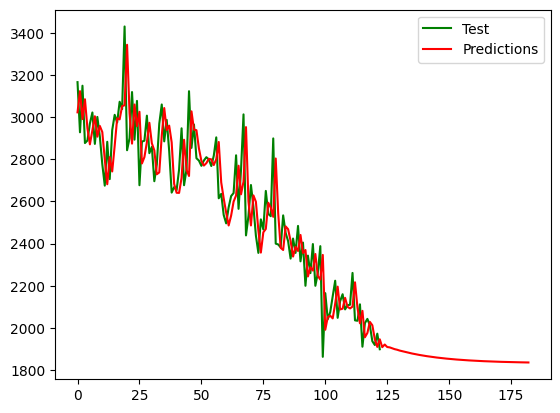

In [67]:
df.loc[0, 'Num2'] = 0
series = df['Num2']

# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(test) + 60):
 model = ARIMA(history, order=(2,1,1))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 if t < len(test):
        obs = test[t]
 else:
    obs = predictions[len(predictions) - 2]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))

# plot forecasts against actual outcomes
plt.plot(test, color = 'green', label = 'Test')
plt.plot(predictions, color='red', label = 'Predictions')
plt.legend()
plt.show()

/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.090396, expected=0.089579
predicted=0.089867, expected=0.091778


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.090912, expected=0.088148
predicted=0.089138, expected=0.092238


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.091226, expected=0.090230
predicted=0.090273, expected=0.090734
predicted=0.090738, expected=0.092320
predicted=0.091553, expected=0.092701


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.092048, expected=0.093893
predicted=0.093063, expected=0.090420


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.091515, expected=0.094982
predicted=0.093702, expected=0.095923


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.094485, expected=0.098912
predicted=0.096890, expected=0.091738


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.093717, expected=0.091407
predicted=0.092998, expected=0.090301


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.091642, expected=0.091867
predicted=0.091993, expected=0.091956


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.091951, expected=0.091777
predicted=0.091852, expected=0.091592


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.091724, expected=0.090897
predicted=0.091289, expected=0.090693


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.091034, expected=0.090524
predicted=0.090806, expected=0.091815


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.091414, expected=0.093877
predicted=0.092695, expected=0.092329
predicted=0.092257, expected=0.090961
predicted=0.091560, expected=0.093206


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.092612, expected=0.095902
predicted=0.094288, expected=0.092824


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.093129, expected=0.091567
predicted=0.092413, expected=0.095596


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.094376, expected=0.092229
predicted=0.092831, expected=0.091954


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.092617, expected=0.095583
predicted=0.094312, expected=0.093260


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.093366, expected=0.091846
predicted=0.092755, expected=0.097843


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.095667, expected=0.098197
predicted=0.096381, expected=0.093917


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.095023, expected=0.098742
predicted=0.097621, expected=0.096308
predicted=0.096298, expected=0.101094


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.099134, expected=0.098430
predicted=0.098300, expected=0.095205
predicted=0.096986, expected=0.102720
predicted=0.100277, expected=0.093700


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.096251, expected=0.094822
predicted=0.096545, expected=0.098036
predicted=0.096712, expected=0.098651


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.097393, expected=0.096343
predicted=0.096987, expected=0.097566


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.097558, expected=0.096617
predicted=0.096883, expected=0.096956


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.097034, expected=0.095623
predicted=0.096264, expected=0.097296


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.096886, expected=0.096597
predicted=0.096535, expected=0.094715


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.095765, expected=0.094463
predicted=0.095254, expected=0.100811


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.097903, expected=0.101167
predicted=0.098935, expected=0.097064
predicted=0.098252, expected=0.095397
predicted=0.097309, expected=0.095410


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.096398, expected=0.095385
predicted=0.095764, expected=0.093853


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.094744, expected=0.092492
predicted=0.093732, expected=0.096981
predicted=0.095468, expected=0.093463
predicted=0.093900, expected=0.093007


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.093979, expected=0.092396
predicted=0.093134, expected=0.093749


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.093463, expected=0.093794


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.093451, expected=0.095539
predicted=0.094538, expected=0.100259


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.097323, expected=0.092968
predicted=0.094706, expected=0.096451
predicted=0.096536, expected=0.099351
predicted=0.097320, expected=0.092117


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.094592, expected=0.099254


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.097757, expected=0.096974
predicted=0.096240, expected=0.095875


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.096765, expected=0.098073


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.097379, expected=0.092357


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.094729, expected=0.091925
predicted=0.093977, expected=0.098358
predicted=0.095493, expected=0.096252
predicted=0.095161, expected=0.091884


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.094494, expected=0.093470


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.094318, expected=0.095351


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.094151, expected=0.097561
predicted=0.095655, expected=0.095209
predicted=0.095428, expected=0.097225
predicted=0.096794, expected=0.095066


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.095611, expected=0.094668
predicted=0.095534, expected=0.093756


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.094547, expected=0.095020
predicted=0.094773, expected=0.096176


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.095205, expected=0.095907
predicted=0.095527, expected=0.094607


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.095255, expected=0.091582
predicted=0.093638, expected=0.096469
predicted=0.095153, expected=0.094546


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.094065, expected=0.093997
predicted=0.094610, expected=0.092278


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.093482, expected=0.098348


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.095847, expected=0.095915
predicted=0.095114, expected=0.094517


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.095564, expected=0.093481
predicted=0.094660, expected=0.095101
predicted=0.094838, expected=0.093118


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.093748, expected=0.093674
predicted=0.094002, expected=0.091794


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.092791, expected=0.099268
predicted=0.095945, expected=0.096276


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.095239, expected=0.094226


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.095584, expected=0.100424
predicted=0.097959, expected=0.102094


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.099035, expected=0.096365
predicted=0.098113, expected=0.096081
predicted=0.098114, expected=0.095945
predicted=0.096733, expected=0.093048


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.094836, expected=0.093180


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.094314, expected=0.094836
predicted=0.094258, expected=0.094314


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.094029, expected=0.094258
predicted=0.094329, expected=0.094029


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.094184, expected=0.094329
predicted=0.094270, expected=0.094184


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.094172, expected=0.094270
predicted=0.094255, expected=0.094172
predicted=0.094199, expected=0.094255
predicted=0.094242, expected=0.094199


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.094205, expected=0.094242
predicted=0.094235, expected=0.094205


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.094213, expected=0.094235


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.094230, expected=0.094213
predicted=0.094216, expected=0.094230


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.094227, expected=0.094216
predicted=0.094218, expected=0.094227


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.094225, expected=0.094218
predicted=0.094220, expected=0.094225
predicted=0.094224, expected=0.094220
predicted=0.094221, expected=0.094224


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.094223, expected=0.094221
predicted=0.094221, expected=0.094223


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.094223, expected=0.094221
predicted=0.094222, expected=0.094223


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.094223, expected=0.094222
predicted=0.094222, expected=0.094223


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.094222, expected=0.094222
predicted=0.094222, expected=0.094222


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.094222, expected=0.094222


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.094222, expected=0.094222
predicted=0.094222, expected=0.094222


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.094222, expected=0.094222
predicted=0.094222, expected=0.094222


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.094222, expected=0.094222


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.094222, expected=0.094222


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.094222, expected=0.094222


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.094222, expected=0.094222
predicted=0.094222, expected=0.094222


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.094222, expected=0.094222


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.094222, expected=0.094222
predicted=0.094222, expected=0.094222


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.094222, expected=0.094222


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.094222, expected=0.094222


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.094222, expected=0.094222
predicted=0.094222, expected=0.094222


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.094222, expected=0.094222
predicted=0.094222, expected=0.094222


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.094222, expected=0.094222


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.094222, expected=0.094222


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.094222, expected=0.094222
predicted=0.094222, expected=0.094222


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.094222, expected=0.094222


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.094222, expected=0.094222
predicted=0.094222, expected=0.094222


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.094222, expected=0.094222
predicted=0.094222, expected=0.094222


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.094222, expected=0.094222


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.094222, expected=0.094222
predicted=0.094222, expected=0.094222


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


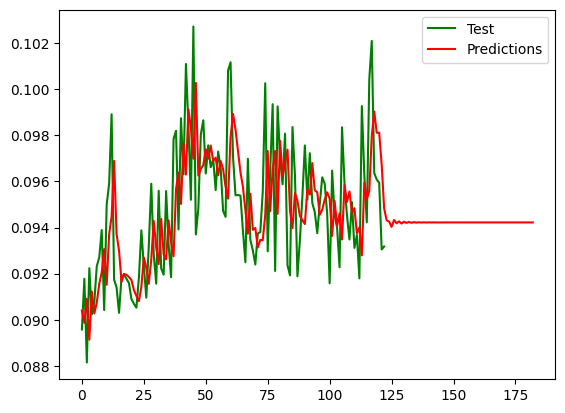

In [68]:
df.loc[0, 'Ratio'] = 0
series = df['Ratio']

# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(test) + 60):
 model = ARIMA(history, order=(2,1,1))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 if t < len(test):
        obs = test[t]
 else:
    obs = predictions[len(predictions) - 2]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))

# plot forecasts against actual outcomes
plt.plot(test, color = 'green', label = 'Test')
plt.plot(predictions, color='red', label = 'Predictions')
plt.legend()
plt.show()

predicted=33798.968774, expected=35343.000000
predicted=34726.318790, expected=31903.000000
predicted=33025.873604, expected=35724.000000
predicted=34259.542979, expected=31191.000000
predicted=32709.255747, expected=32018.000000
predicted=31374.244142, expected=32733.000000
predicted=32263.028777, expected=32734.000000
predicted=32589.231507, expected=30992.000000
predicted=31380.976049, expected=31962.000000
predicted=31345.506562, expected=32172.000000
predicted=31932.495688, expected=29237.000000
predicted=29977.400925, expected=27887.000000
predicted=27817.704129, expected=29147.000000
predicted=28144.577898, expected=29497.000000
predicted=29014.135511, expected=32142.000000
predicted=31056.755651, expected=33344.000000
predicted=33040.567916, expected=37309.000000
predicted=36322.740499, expected=33418.000000
predicted=35230.243133, expected=33102.000000
predicted=33312.099131, expected=35050.000000
predicted=34536.465050, expected=31277.000000
predicted=32695.413433, expected=3

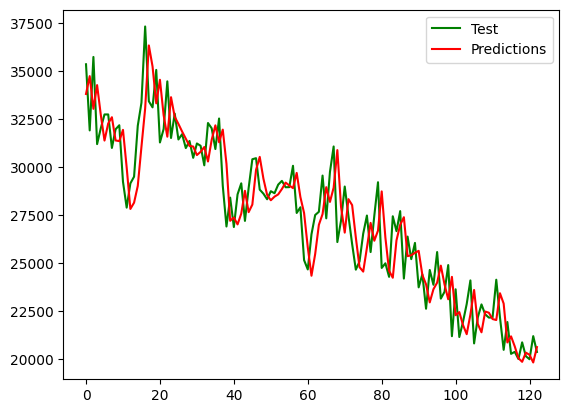

In [69]:
df.loc[0, 'Num1'] = 0
series = df['Num1']

# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
 model = ARIMA(history, order=(2,1,1))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
nrmse = rmse / (series.max() - series.min())
print('Test RMSE: %.3f' % rmse)
print('Test NRMSE: %.3f' % nrmse)
# plot forecasts against actual outcomes
plt.plot(test, color = 'green', label = 'Test')
plt.plot(predictions, color='red', label = 'Predictions')
plt.legend()
plt.show()

predicted=3022.707860, expected=3166.000000
predicted=3123.158927, expected=2928.000000
predicted=2990.800174, expected=3149.000000
predicted=3084.722169, expected=2877.000000
predicted=2947.339191, expected=2889.000000
predicted=2870.941713, expected=2970.000000
predicted=2937.880063, expected=3022.000000
predicted=3004.032451, expected=2873.000000
predicted=2907.126627, expected=3001.000000
predicted=2958.319795, expected=2909.000000
predicted=2929.291258, expected=2777.000000
predicted=2799.996907, expected=2675.000000
predicted=2681.711220, expected=2883.000000
predicted=2810.116278, expected=2706.000000
predicted=2742.300815, expected=2938.000000
predicted=2864.263435, expected=3011.000000
predicted=2994.255206, expected=2974.500000
predicted=2989.193593, expected=3073.000000
predicted=3052.325336, expected=3038.000000
predicted=3056.198731, expected=3430.000000
predicted=3343.164653, expected=2843.000000
predicted=3019.087606, expected=2900.000000
predicted=2874.277747, expected=

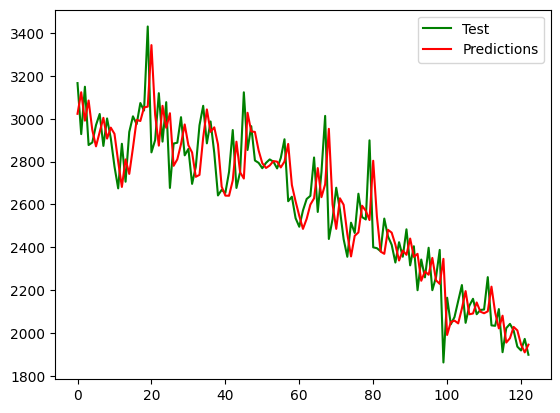

In [70]:
df.loc[0, 'Num2'] = 0
series = df['Num2']

# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
 model = ARIMA(history, order=(2,1,1))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
nrmse = rmse / (series.max() - series.min())
print('Test RMSE: %.3f' % rmse)
print('Test NRMSE: %.3f' % nrmse)
# plot forecasts against actual outcomes
plt.plot(test, color = 'green', label = 'Test')
plt.plot(predictions, color='red', label = 'Predictions')
plt.legend()
plt.show()

/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.090171, expected=0.089579
predicted=0.089636, expected=0.091778


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.091763, expected=0.088148
predicted=0.088503, expected=0.092238


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.092150, expected=0.090230
predicted=0.090461, expected=0.090734


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.090937, expected=0.092320
predicted=0.092348, expected=0.092701


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.092924, expected=0.093893
predicted=0.094188, expected=0.090420


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.091010, expected=0.094982
predicted=0.094895, expected=0.095923


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.096131, expected=0.098912


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.099330, expected=0.091738
predicted=0.092678, expected=0.091407


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.091526, expected=0.090301
predicted=0.090330, expected=0.091867
predicted=0.091811, expected=0.091956


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.092021, expected=0.091777
predicted=0.091840, expected=0.091592


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.091640, expected=0.090897


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.090944, expected=0.090693
predicted=0.090669, expected=0.090524


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.090491, expected=0.091815
predicted=0.091724, expected=0.093877


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.093865, expected=0.092329
predicted=0.092581, expected=0.090961
predicted=0.091058, expected=0.093206


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.093092, expected=0.095902
predicted=0.095963, expected=0.092824
predicted=0.093215, expected=0.091567


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.091658, expected=0.095596
predicted=0.095470, expected=0.092229


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.092567, expected=0.091954
predicted=0.092024, expected=0.095583


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.095402, expected=0.093260
predicted=0.093516, expected=0.091846


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.092075, expected=0.097843
predicted=0.097517, expected=0.098197


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.098354, expected=0.093917
predicted=0.094696, expected=0.098742


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.098916, expected=0.096308
predicted=0.096642, expected=0.101094


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.101238, expected=0.098430


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.098907, expected=0.095205
predicted=0.096044, expected=0.102720


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.102359, expected=0.093700
predicted=0.094773, expected=0.094822


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.095159, expected=0.098036
predicted=0.096754, expected=0.098651


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.098095, expected=0.096343
predicted=0.096887, expected=0.097566
predicted=0.097646, expected=0.096617
predicted=0.096603, expected=0.096956
predicted=0.096955, expected=0.095623
predicted=0.095657, expected=0.097296


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.097024, expected=0.096597
predicted=0.096502, expected=0.094715


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.094944, expected=0.094463
predicted=0.094295, expected=0.100811
predicted=0.099814, expected=0.101167


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.101197, expected=0.097064
predicted=0.098338, expected=0.095397


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.096036, expected=0.095410
predicted=0.095186, expected=0.095385


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.095000, expected=0.093853
predicted=0.093636, expected=0.092492


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.092225, expected=0.096981
predicted=0.096089, expected=0.093463


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.093338, expected=0.093007
predicted=0.093113, expected=0.092396


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.092006, expected=0.093749
predicted=0.093208, expected=0.093794


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.093424, expected=0.095539
predicted=0.095282, expected=0.100259


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.099940, expected=0.092968
predicted=0.094091, expected=0.096451


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.096782, expected=0.099351
predicted=0.098816, expected=0.092117


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.093266, expected=0.099254


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.098984, expected=0.096974
predicted=0.096664, expected=0.095875
predicted=0.096862, expected=0.098073
predicted=0.097899, expected=0.092357


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.092954, expected=0.091925
predicted=0.091868, expected=0.098358


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.096172, expected=0.096252
predicted=0.095965, expected=0.091884
predicted=0.093378, expected=0.093470


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.093137, expected=0.095351
predicted=0.094101, expected=0.097561


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.097158, expected=0.095209


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.095909, expected=0.097225
predicted=0.097709, expected=0.095066


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.095364, expected=0.094668
predicted=0.095062, expected=0.093756
predicted=0.093557, expected=0.095020
predicted=0.094533, expected=0.096176


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.095698, expected=0.095907
predicted=0.096061, expected=0.094607
predicted=0.095063, expected=0.091582


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.091921, expected=0.096469
predicted=0.095506, expected=0.094546


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.094081, expected=0.093997
predicted=0.094553, expected=0.092278


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.092314, expected=0.098348
predicted=0.097414, expected=0.095915


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.095999, expected=0.094517
predicted=0.095641, expected=0.093481


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.093696, expected=0.095101
predicted=0.094682, expected=0.093118


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.093017, expected=0.093674
predicted=0.093584, expected=0.091794


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.091600, expected=0.099268
predicted=0.098197, expected=0.096276


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.096516, expected=0.094226
predicted=0.095586, expected=0.100424


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.099960, expected=0.102094


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.101986, expected=0.096365
predicted=0.098386, expected=0.096081
predicted=0.097275, expected=0.095945
predicted=0.095643, expected=0.093048


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.093030, expected=0.093180
Test RMSE: 0.003
Test NRMSE: 0.030


/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


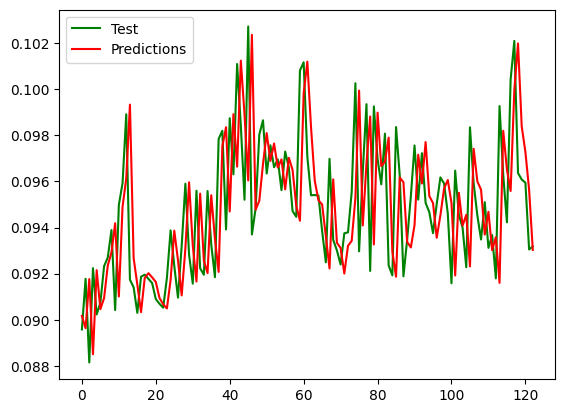

In [71]:
df.loc[0, 'Ratio'] = 0
series = df['Ratio']

# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
 model = ARIMA(history, order=(2,2,1))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
nrmse = rmse / (series.max() - series.min())
print('Test RMSE: %.3f' % rmse)
print('Test NRMSE: %.3f' % nrmse)
# plot forecasts against actual outcomes
plt.plot(test, color = 'green', label = 'Test')
plt.plot(predictions, color='red', label = 'Predictions')
plt.legend()
plt.show()

In [72]:
df1 = pd.read_excel('WordData.xlsx')

In [73]:
df1.drop(['Unnamed: 0', 'Unnamed: 6', 'Unnamed: 7'], axis = 1)

,Word,Word Frequency,Rpt,Letter Freq,Scores
0,aaron,-0.11,1,18114.067746,17.781582
1,aback,0.11,1,1310.371787,29.187738
2,abase,0.03,1,10770.009278,21.990761
3,abash,0.23,1,3401.586810,28.703003
4,abate,-0.09,1,11737.263997,19.862716
...,...,...,...,...,...
3615,zippy,-0.17,1,75.069303,29.099347
3616,zoned,-0.32,0,412.079444,19.802475
3617,zones,-0.67,0,701.747053,13.684863
3618,zooms,-0.48,1,235.904170,23.182935


In [74]:
adfuller_test(df1['Scores'])

ADF Test Statistic : -15.491818500324985
p-value : 2.479216308736074e-28
#Lags Used : 9
Number of Observations : 3610
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [75]:
kpss_test(df1['Scores'])

KPSS Statistic: 0.5773387091476667
p-value: 0.02469648098657575
num lags: 21
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


In [76]:
df['Word Difficulty'] = 0

In [77]:
for i in range(359):
    for j in range (3620):
        if df['Word'][i] == df1['Word'][j]:
            df.loc[i, 'Word Difficulty'] = df1['Scores'][j]

In [78]:
df['Word Difficulty'].value_counts()

0.000000     27
8.862434      1
22.105417     1
9.762645      1
24.388348     1
             ..
27.776936     1
6.601985      1
17.987052     1
13.331033     1
16.728471     1
Name: Word Difficulty, Length: 333, dtype: int64

In [79]:
for i in range(359):
    if df['Word Difficulty'][i] == 0:
        print(df['Word'][i])
        print(i)

favor 
5
wrung
23
ultra
36
caulk
40
epoxy
78
trope
85
heist
109
zesty
111
tash
112
gamer
133
vouch
138
primo
159
retro
171
droll
172
hunky
218
ruder
232
parer
252
trice
255
marxh
271
ionic
278
flout
292
piney
298
glyph
315
clen
323
woken
332
naïve
338
condo
354


In [80]:
df2 = df.copy()

In [81]:
df2.drop(['Date', 'Num1_diff', 'Num2_diff', 'Ratio_diff', 'Ratio_diff_2', 'Word', 'Ratio'], axis = 1, inplace = True)

In [82]:
df2

,Contest number,Num1,Num2,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X),Word Difficulty
Contest number,,,,,,,,,,,
0,202,0.0,0.0,1,3,23,39,24,9,1,18.420614
1,203,101503.0,1763.0,1,5,23,31,24,14,2,12.996773
2,204,91477.0,1913.0,1,3,13,27,30,22,4,22.135179
3,205,107134.0,2242.0,1,4,16,30,30,17,2,22.172541
4,206,153880.0,3017.0,1,9,35,34,16,5,1,11.466879
...,...,...,...,...,...,...,...,...,...,...,...
354,556,20879.0,2012.0,0,2,17,35,29,14,3,0.000000
355,557,20160.0,1937.0,0,3,21,40,25,9,1,18.359876
356,558,20001.0,1919.0,0,2,16,38,30,12,2,23.350619


<AxesSubplot:xlabel='Contest number'>

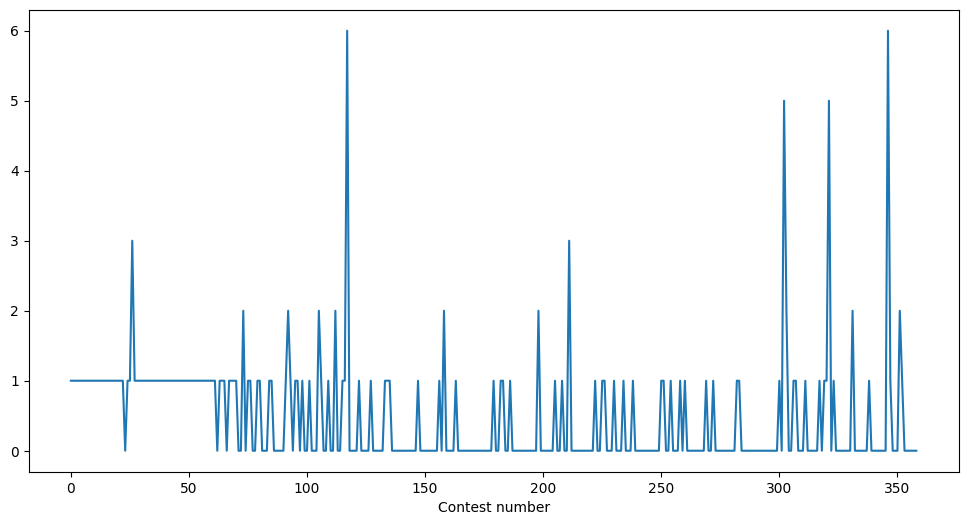

In [83]:
df['1 try'].plot(figsize = (12, 6))

In [84]:
df

,Date,Contest number,Word,Num1,Num2,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X),Ratio,Num1_diff,Num2_diff,Ratio_diff,Ratio_diff_2,Word Difficulty
Contest number,,,,,,,,,,,,,,,,,,
0,2022-01-07,202,slump,0.0,0.0,1,3,23,39,24,9,1,0.000000,0.0,0.0,0.000000,0.000000,18.420614
1,2022-01-08,203,crank,101503.0,1763.0,1,5,23,31,24,14,2,0.017369,20873.0,401.0,0.000477,0.000477,12.996773
2,2022-01-09,204,gorge,91477.0,1913.0,1,3,13,27,30,22,4,0.020912,-10026.0,150.0,0.003543,0.003066,22.135179
3,2022-01-10,205,query,107134.0,2242.0,1,4,16,30,30,17,2,0.020927,15657.0,329.0,0.000015,-0.003529,22.172541
4,2022-01-11,206,drink,153880.0,3017.0,1,9,35,34,16,5,1,0.019606,46746.0,775.0,-0.001321,-0.001336,11.466879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,2022-12-27,556,condo,20879.0,2012.0,0,2,17,35,29,14,3,0.096365,868.0,-31.0,-0.005729,-0.007399,0.000000
355,2022-12-28,557,impel,20160.0,1937.0,0,3,21,40,25,9,1,0.096081,-719.0,-75.0,-0.000283,0.005446,18.359876
356,2022-12-29,558,havoc,20001.0,1919.0,0,2,16,38,30,12,2,0.095945,-159.0,-18.0,-0.000136,0.000147,23.350619


In [85]:
data = df.drop(['Word', 'Date', 'Num1', 'Num2', 'Ratio', 'Ratio_diff'], axis = 1)

In [86]:
cols = data.columns

In [87]:
#creating the train and validation set
train = data[:int(0.8*(len(data)))]
valid = data[int(0.8*(len(data))):]

In [88]:
#fit the model
from statsmodels.tsa.vector_ar.var_model import VAR
model = VAR(endog=train)
model_fit = model.fit()

In [89]:
# make prediction on validation
prediction = model_fit.forecast(y = model_fit.endog, steps=len(valid))

In [90]:
#converting predictions to dataframe
pred = pd.DataFrame(index=range(0,len(prediction)),columns=[cols])
for j in range(0,12):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]

In [91]:
pred

,Contest number,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X),Num1_diff,Num2_diff,Ratio_diff_2,Word Difficulty
0,489.0,-0.057167,4.248785,21.242211,34.76241,24.873806,10.841088,3.444665,-1441.996156,-20.844521,0.002542,16.3937
1,490.0,-0.042952,4.763898,21.451487,34.78627,24.469365,10.997538,3.244554,-1116.822811,-55.310708,-0.001298,16.925801
2,491.0,-0.022231,4.748928,21.405627,34.820372,24.578184,10.868815,3.262142,-1015.73664,-75.380204,0.000577,17.00005
3,492.0,-0.03055,4.771607,21.411166,34.721206,24.497167,10.928734,3.31089,-1451.799371,-68.38936,-0.000269,16.929404
4,493.0,-0.032554,4.744731,21.405937,34.817099,24.547846,10.873154,3.272999,-1219.761331,-76.25002,0.000094,16.995485
...,...,...,...,...,...,...,...,...,...,...,...,...
67,556.0,-0.248566,4.361725,21.088966,35.69037,24.754834,10.411353,3.405787,-1768.510592,-106.07375,-0.000015,17.576297
68,557.0,-0.251988,4.355524,21.083888,35.704649,24.758369,10.403814,3.40772,-1775.994739,-106.598241,-0.000015,17.585889
69,558.0,-0.255411,4.349323,21.07881,35.718928,24.761905,10.396275,3.409652,-1783.478886,-107.122733,-0.000015,17.595482
70,559.0,-0.258833,4.343122,21.073732,35.733207,24.765441,10.388736,3.411585,-1790.963033,-107.647224,-0.000015,17.605074


In [92]:
#check rmse
for i in cols:
    print('rmse value for', i, 'is : ', sqrt(mean_squared_error(pred[i], valid[i])))

rmse value for Contest number is :  3.097414887532418e-10
rmse value for 1 try is :  1.2936016722178498
rmse value for 2 tries is :  4.778641050661328
rmse value for 3 tries is :  8.94387956100262
rmse value for 4 tries is :  5.616013005982688
rmse value for 5 tries is :  6.663329717149563
rmse value for 6 tries is :  6.310738809618284
rmse value for 7 or more tries (X) is :  3.081145947530133
rmse value for Num1_diff is :  2254.21957233159
rmse value for Num2_diff is :  183.54704587833967
rmse value for Ratio_diff_2 is :  0.005160846024805822
rmse value for Word Difficulty is :  7.8180535288648665


In [93]:
#make final predictions
model = VAR(endog=data)
model_fit = model.fit()
yhat = model_fit.forecast(y = model_fit.endog, steps=60)

pred1 = pd.DataFrame(index=range(0,len(yhat)),columns=[cols])
for j in range(0,12):
    for i in range(0, len(yhat)):
       pred1.iloc[i][j] = yhat[i][j]
    
print(yhat)

[[ 5.61000000e+02  7.77393830e-02  5.71586748e+00  2.36187493e+01
   3.49206788e+01  2.31447485e+01  9.94775304e+00  2.45668836e+00
   2.36417940e+03  1.00000122e+02 -2.18796064e-03  1.66250594e+01]
 [ 5.62000000e+02  1.35870859e-01  5.55593732e+00  2.35421693e+01
   3.50434168e+01  2.31668608e+01  9.76151825e+00  2.55885613e+00
  -9.63084562e+02 -7.64254223e+01  9.27581888e-04  1.57147216e+01]
 [ 5.63000000e+02  1.48596460e-01  5.74914817e+00  2.36462732e+01
   3.46853488e+01  2.30137171e+01  9.86907555e+00  2.55211289e+00
  -8.91015848e+02 -4.74529237e+01 -4.58726380e-04  1.56522804e+01]
 [ 5.64000000e+02  1.45508182e-01  5.67673676e+00  2.36544303e+01
   3.48835831e+01  2.30863452e+01  9.76018141e+00  2.48743724e+00
  -7.48739473e+02 -5.98923919e+01  1.69666818e-04  1.56153491e+01]
 [ 5.65000000e+02  1.44929982e-01  5.71279241e+00  2.36677874e+01
   3.48021363e+01  2.30433619e+01  9.79726886e+00  2.51302778e+00
  -8.51852114e+02 -5.33015936e+01 -9.32850150e-05  1.56185799e+01]
 [ 5.

In [94]:
pred1

,Contest number,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X),Num1_diff,Num2_diff,Ratio_diff_2,Word Difficulty
0,561.0,0.077739,5.715867,23.618749,34.920679,23.144748,9.947753,2.456688,2364.179404,100.000122,-0.002188,16.625059
1,562.0,0.135871,5.555937,23.542169,35.043417,23.166861,9.761518,2.558856,-963.084562,-76.425422,0.000928,15.714722
2,563.0,0.148596,5.749148,23.646273,34.685349,23.013717,9.869076,2.552113,-891.015848,-47.452924,-0.000459,15.65228
3,564.0,0.145508,5.676737,23.65443,34.883583,23.086345,9.760181,2.487437,-748.739473,-59.892392,0.00017,15.615349
4,565.0,0.14493,5.712792,23.667787,34.802136,23.043362,9.797269,2.513028,-851.852114,-53.301594,-0.000093,15.61858
5,566.0,0.142807,5.694402,23.665089,34.85176,23.059032,9.771186,2.501907,-800.959071,-57.097354,0.000015,15.623478
6,567.0,0.141296,5.70206,23.675082,34.844425,23.046851,9.767719,2.503968,-830.593182,-55.750676,-0.00003,15.621231
7,568.0,0.139412,5.69747,23.677905,34.86264,23.047616,9.755527,2.500795,-822.680012,-56.835836,-0.000011,15.625082
8,569.0,0.137704,5.698315,23.684072,34.869688,23.042725,9.74682,2.499772,-831.129347,-56.797058,-0.000019,15.625625
9,570.0,0.135911,5.696781,23.688736,34.881591,23.040276,9.736691,2.497859,-832.594659,-57.262993,-0.000016,15.627842


<AxesSubplot:>

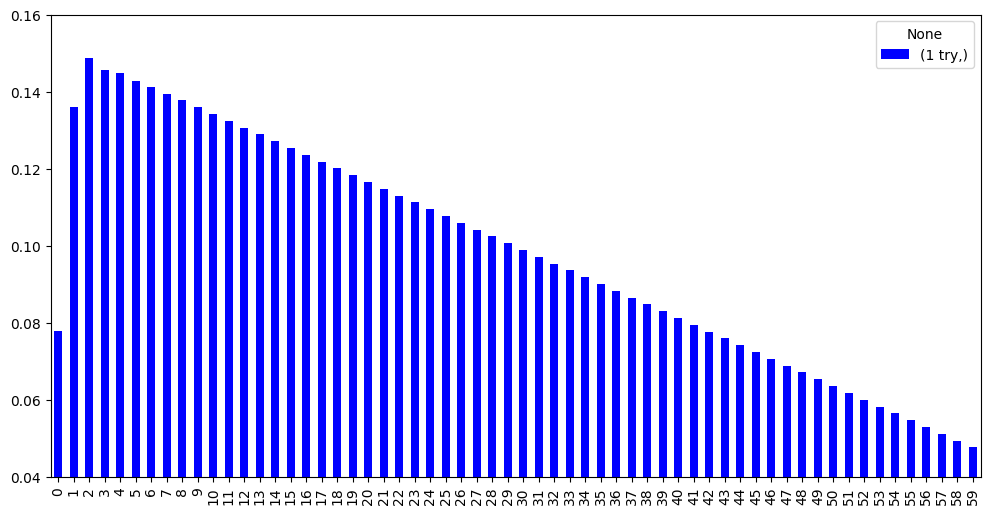

In [95]:
pred1['1 try'].plot(kind = 'bar', figsize = (12, 6), colormap = 'winter', ylim = [0.04, 0.16])

<AxesSubplot:>

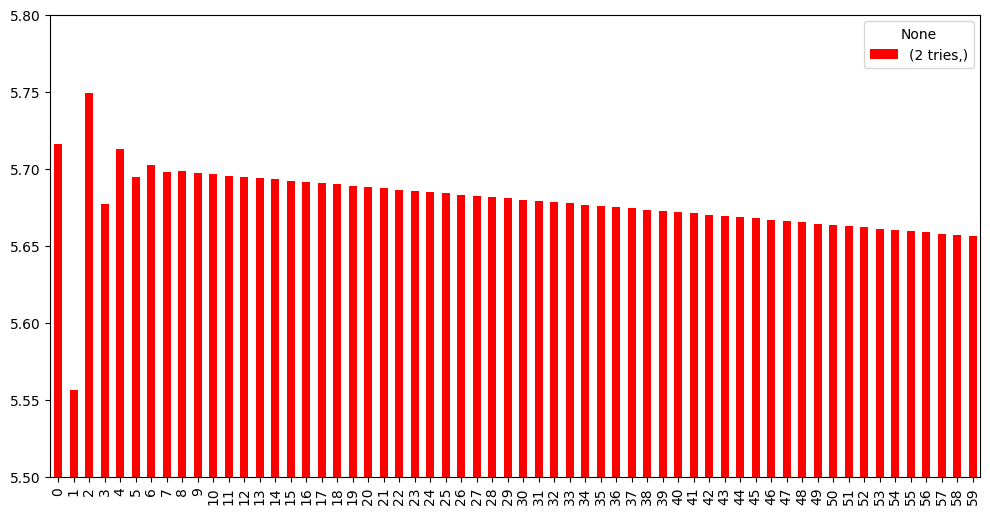

In [96]:
pred1['2 tries'].plot(kind = 'bar', figsize = (12, 6), colormap = 'autumn', ylim = [5.5, 5.8])

<AxesSubplot:>

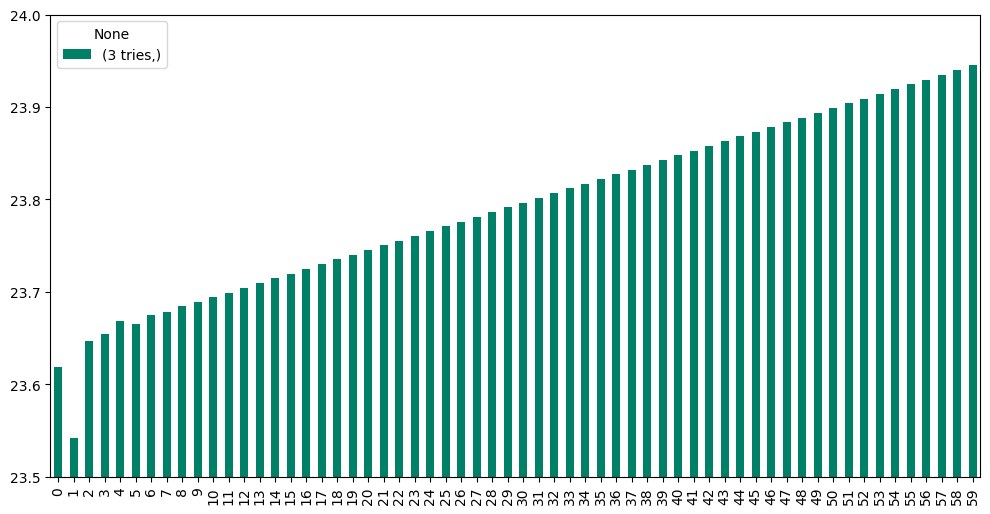

In [97]:
pred1['3 tries'].plot(kind = 'bar', figsize = (12, 6), colormap = 'summer', ylim = [23.5, 24])

<AxesSubplot:>

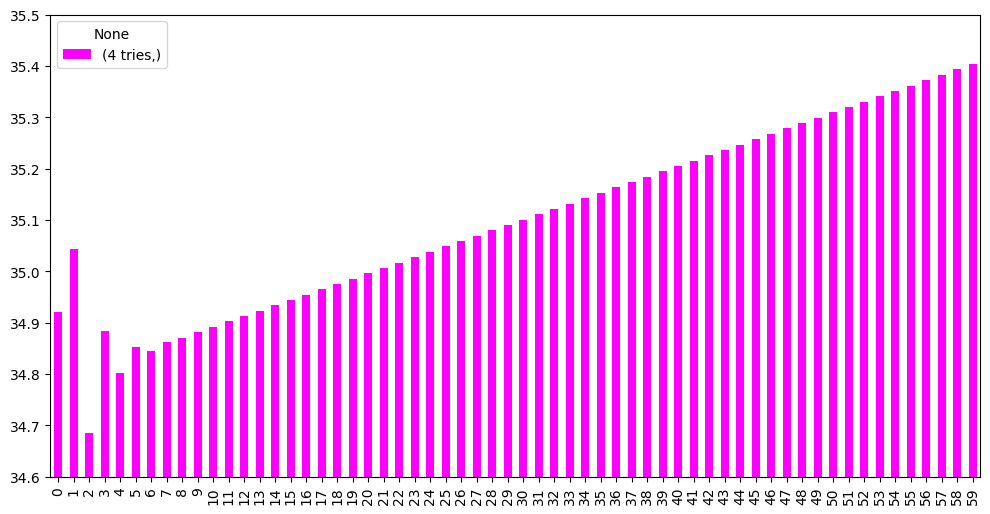

In [98]:
pred1['4 tries'].plot(kind = 'bar', figsize = (12, 6), colormap = 'spring', ylim = [34.6, 35.5])

<AxesSubplot:>

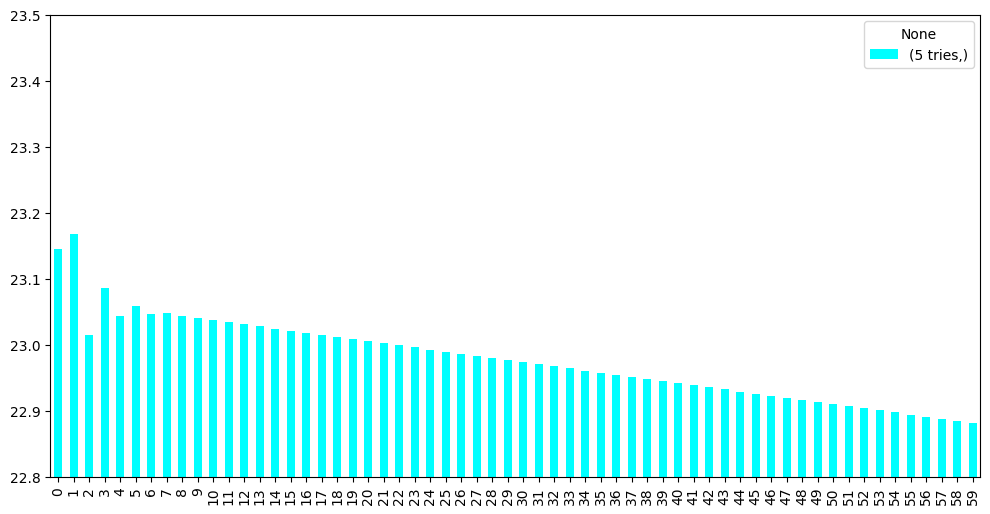

In [99]:
pred1['5 tries'].plot(kind = 'bar', figsize = (12, 6), colormap = 'cool', ylim = [22.8, 23.5])

<AxesSubplot:>

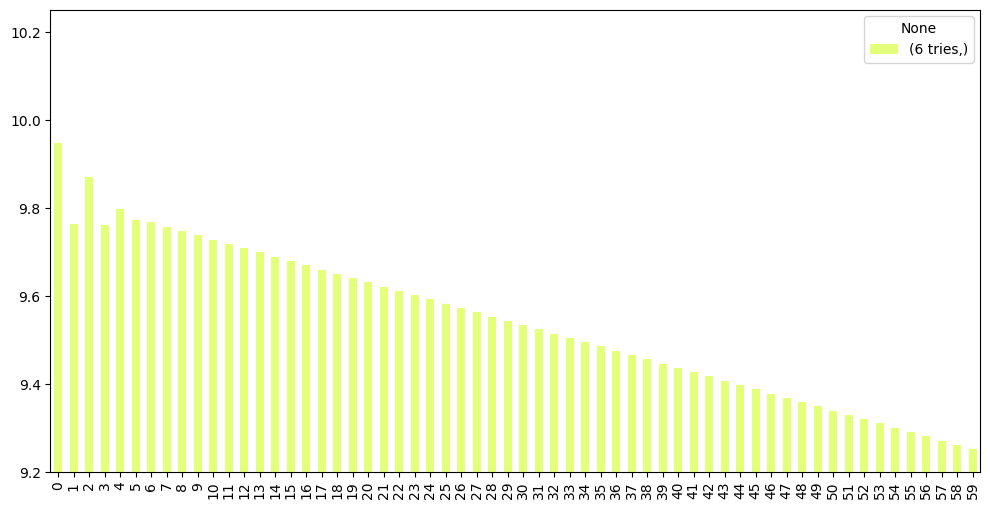

In [100]:
pred1['6 tries'].plot(kind = 'bar', figsize = (12, 6), colormap = 'Wistia', ylim = [9.2, 10.25])

<AxesSubplot:>

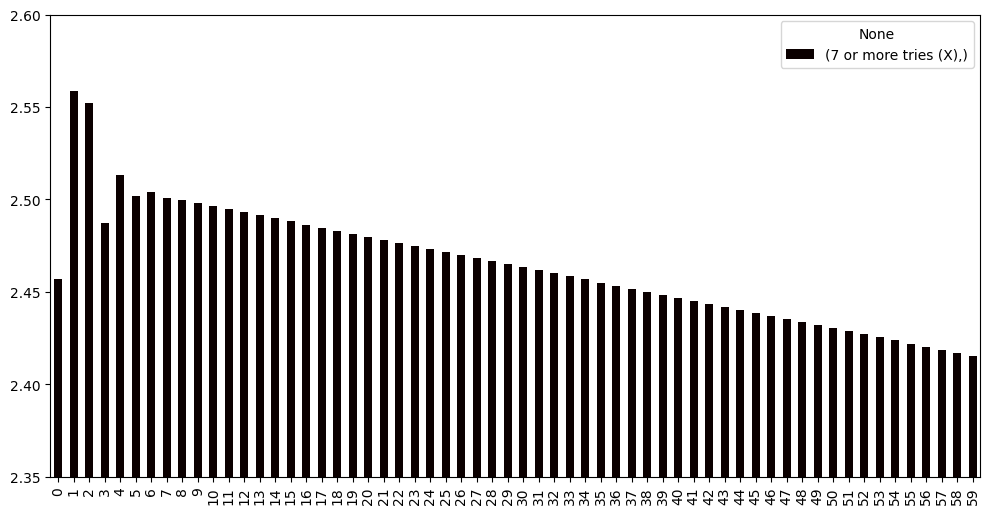

In [101]:
pred1['7 or more tries (X)'].plot(kind = 'bar', figsize = (12, 6), colormap = 'hot', ylim = [2.35, 2.6])

In [102]:
data

,Contest number,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X),Num1_diff,Num2_diff,Ratio_diff_2,Word Difficulty
Contest number,,,,,,,,,,,,
0,202,1,3,23,39,24,9,1,0.0,0.0,0.000000,18.420614
1,203,1,5,23,31,24,14,2,20873.0,401.0,0.000477,12.996773
2,204,1,3,13,27,30,22,4,-10026.0,150.0,0.003066,22.135179
3,205,1,4,16,30,30,17,2,15657.0,329.0,-0.003529,22.172541
4,206,1,9,35,34,16,5,1,46746.0,775.0,-0.001336,11.466879
...,...,...,...,...,...,...,...,...,...,...,...,...
354,556,0,2,17,35,29,14,3,868.0,-31.0,-0.007399,0.000000
355,557,0,3,21,40,25,9,1,-719.0,-75.0,0.005446,18.359876
356,558,0,2,16,38,30,12,2,-159.0,-18.0,0.000147,23.350619


In [103]:
pred2 = pred1.drop(['Contest number', 'Num1_diff', 'Num2_diff', 'Ratio_diff_2', 'Word Difficulty'], axis = 1)

/Users/gaohanlin/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [104]:
pred2

,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X)
0,0.077739,5.715867,23.618749,34.920679,23.144748,9.947753,2.456688
1,0.135871,5.555937,23.542169,35.043417,23.166861,9.761518,2.558856
2,0.148596,5.749148,23.646273,34.685349,23.013717,9.869076,2.552113
3,0.145508,5.676737,23.65443,34.883583,23.086345,9.760181,2.487437
4,0.14493,5.712792,23.667787,34.802136,23.043362,9.797269,2.513028
5,0.142807,5.694402,23.665089,34.85176,23.059032,9.771186,2.501907
6,0.141296,5.70206,23.675082,34.844425,23.046851,9.767719,2.503968
7,0.139412,5.69747,23.677905,34.86264,23.047616,9.755527,2.500795
8,0.137704,5.698315,23.684072,34.869688,23.042725,9.74682,2.499772
9,0.135911,5.696781,23.688736,34.881591,23.040276,9.736691,2.497859


<AxesSubplot:>

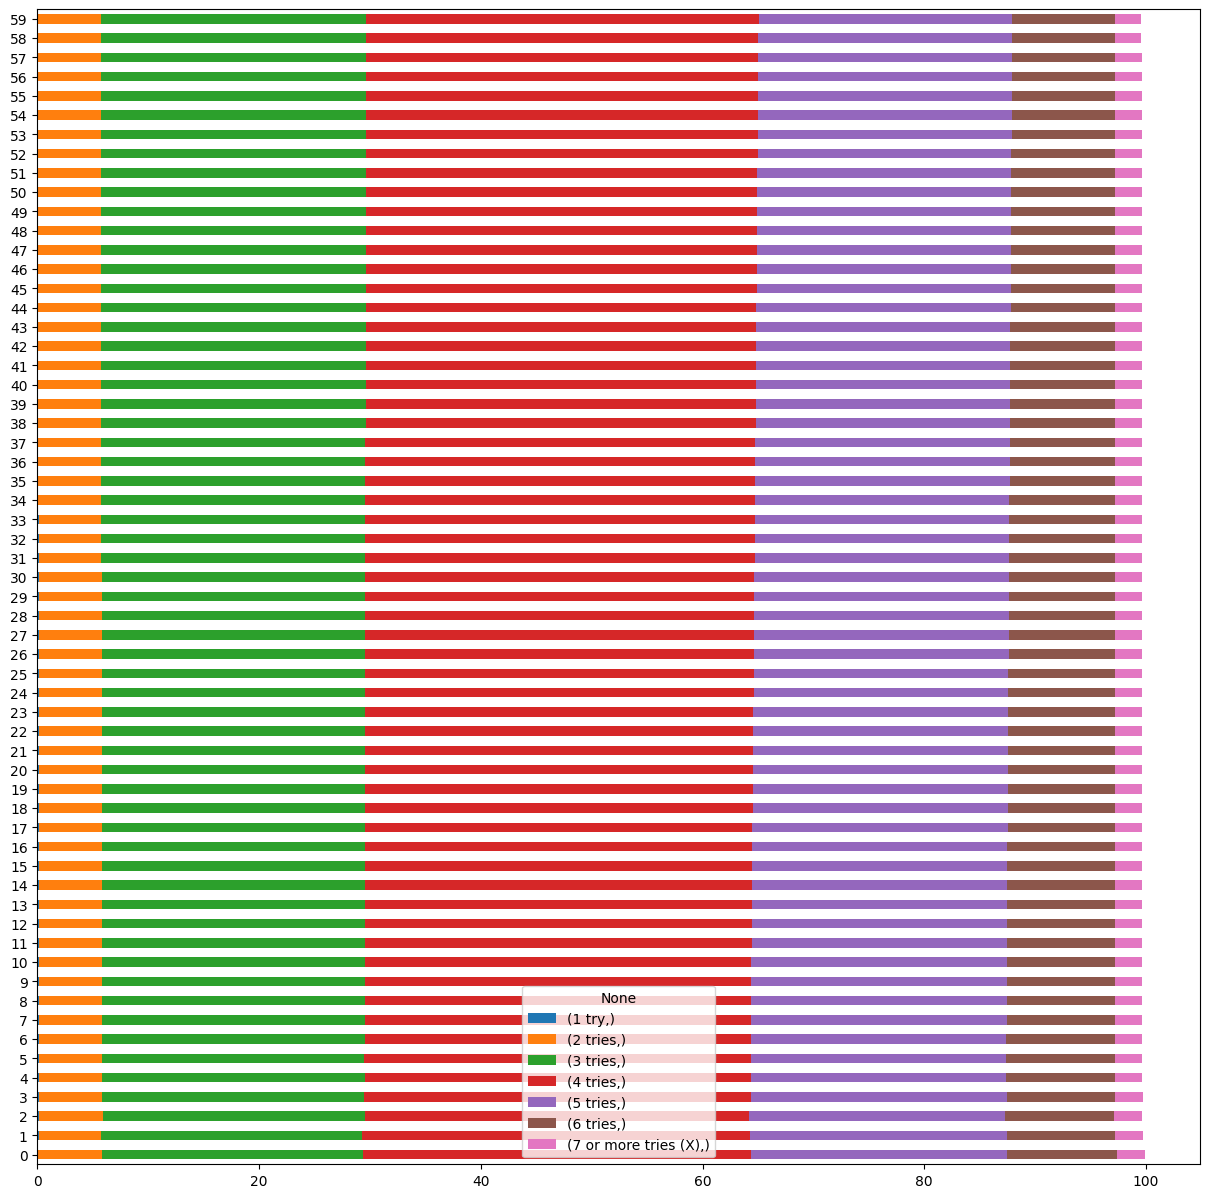

In [105]:
pred2.plot.barh(stacked = True, figsize = (15, 15))